# Artificial Neural Network (ANN) - Fashion MNIST - Classification - Case Study - Tensorflow 2.0.0
---
Author: Bhaveshkumar Thaker

---

## Import Packages

In [1]:
#pip install tensorflow==2.0.0-rc1
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 68kB/s 
     |████████████████████████████████| 450kB 43.5MB/s 
     |████████████████████████████████| 3.8MB 48.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [3]:
print(tf.version.VERSION)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

2.0.0
Eager mode:  True
Hub version:  0.6.0
GPU is available


In [4]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<Figure size 1008x792 with 0 Axes>

## Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories.

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

Loading the dataset returns four NumPy arrays:

*   The train_images and train_labels arrays are the training set—the data the model uses to learn.
*   The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
labels, counts = np.unique(train_labels, return_counts=True)

print(np.asarray((labels, counts)).T)

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_images)

10000

## Preprocess the data

If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

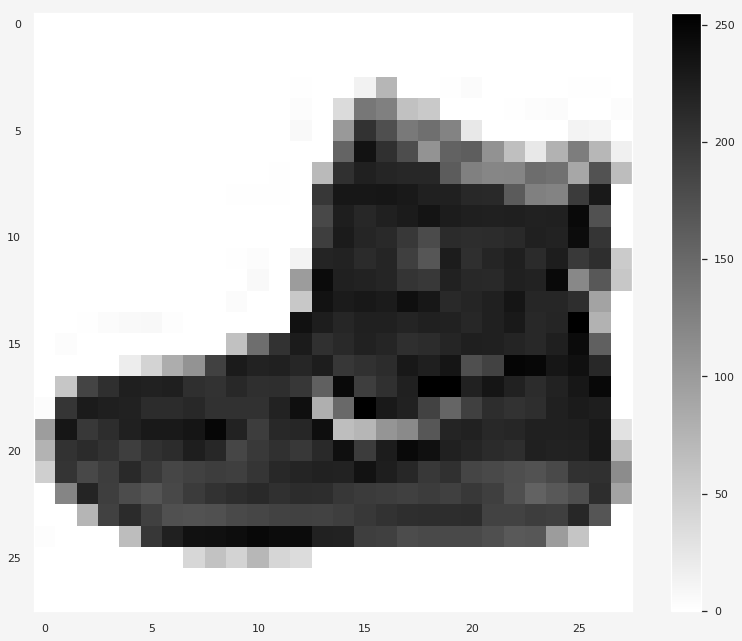

In [12]:
plt.figure()
plt.imshow(train_images[0], cmap='gray_r', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

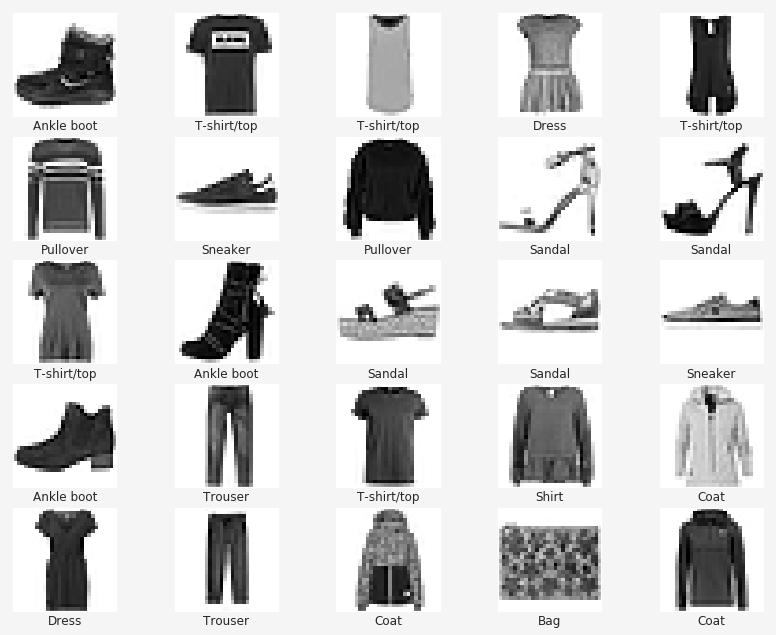

In [14]:
for i in range(25) : 
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray_r', interpolation='nearest')
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)

plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [15]:
input_size = 784
output_size = 10
hidden_layer_size = 256

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(output_size, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_images, train_labels, epochs=10, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 7s - loss: 0.4717 - sparse_categorical_accuracy: 0.8294
Epoch 2/10
60000/60000 - 6s - loss: 0.3586 - sparse_categorical_accuracy: 0.8694
Epoch 3/10
60000/60000 - 6s - loss: 0.3206 - sparse_categorical_accuracy: 0.8802
Epoch 4/10
60000/60000 - 6s - loss: 0.2979 - sparse_categorical_accuracy: 0.8899
Epoch 5/10
60000/60000 - 6s - loss: 0.2799 - sparse_categorical_accuracy: 0.8950
Epoch 6/10
60000/60000 - 6s - loss: 0.2648 - sparse_categorical_accuracy: 0.8993
Epoch 7/10
60000/60000 - 6s - loss: 0.2510 - sparse_categorical_accuracy: 0.9044
Epoch 8/10
60000/60000 - 6s - loss: 0.2389 - sparse_categorical_accuracy: 0.9096
Epoch 9/10
60000/60000 - 6s - loss: 0.2290 - sparse_categorical_accuracy: 0.9136
Epoch 10/10
60000/60000 - 6s - loss: 0.2218 - sparse_categorical_accuracy: 0.9147


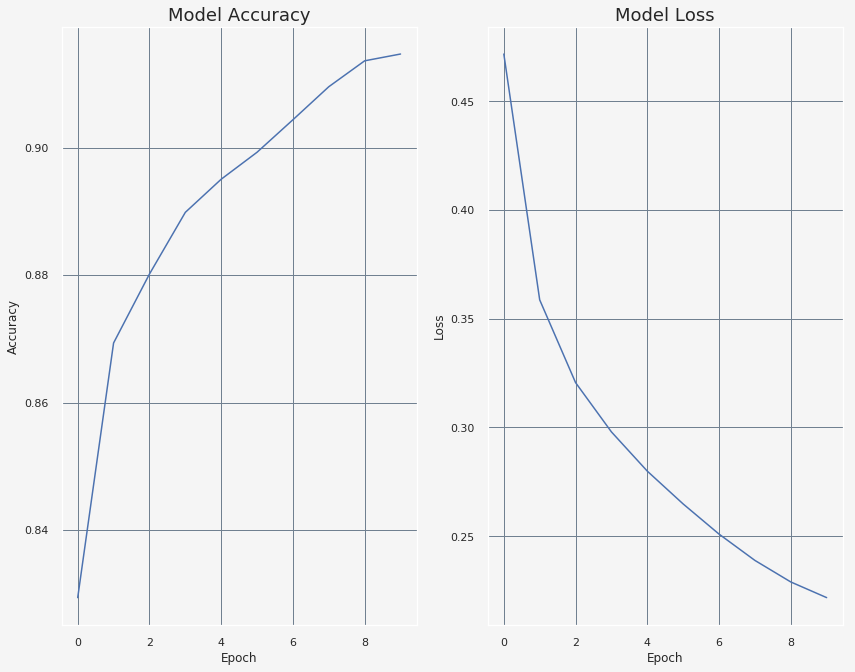

In [17]:
plt.subplot(1,2,1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2188 - sparse_categorical_accuracy: 0.8835

Test accuracy: 0.8835


In [0]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([4.4288949e-08, 1.0258271e-09, 2.1338813e-08, 1.6634992e-11,
       1.5935637e-09, 1.7674573e-05, 4.1148649e-09, 2.3001307e-03,
       3.9758836e-09, 9.9768209e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

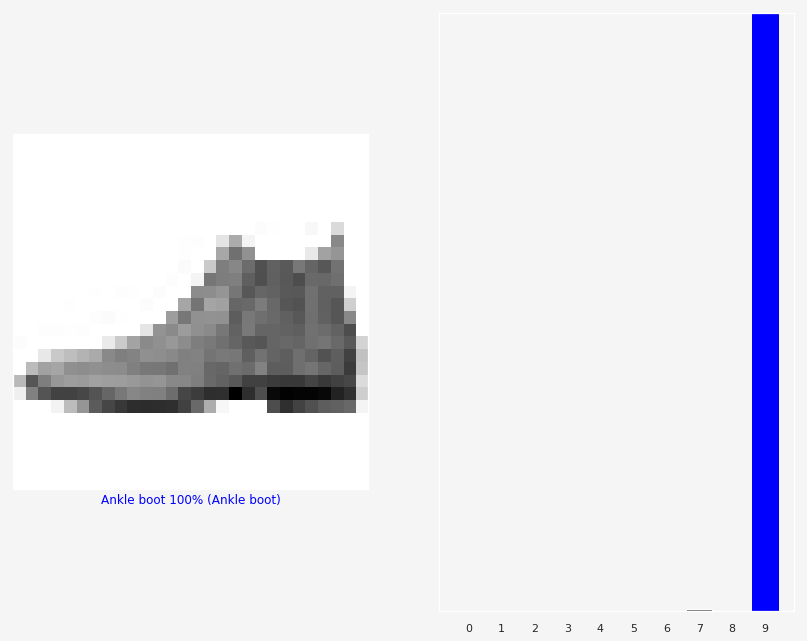

In [24]:
i = 0
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

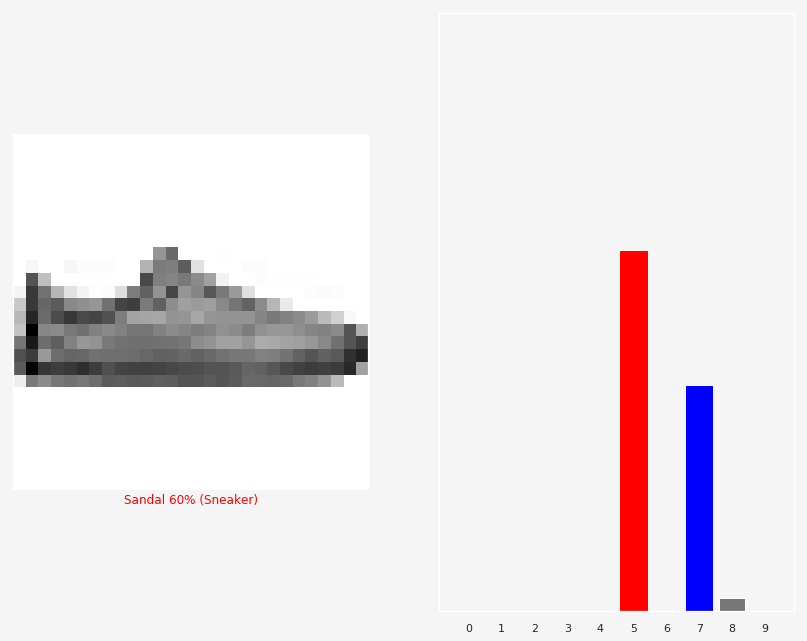

In [25]:
i = 12
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

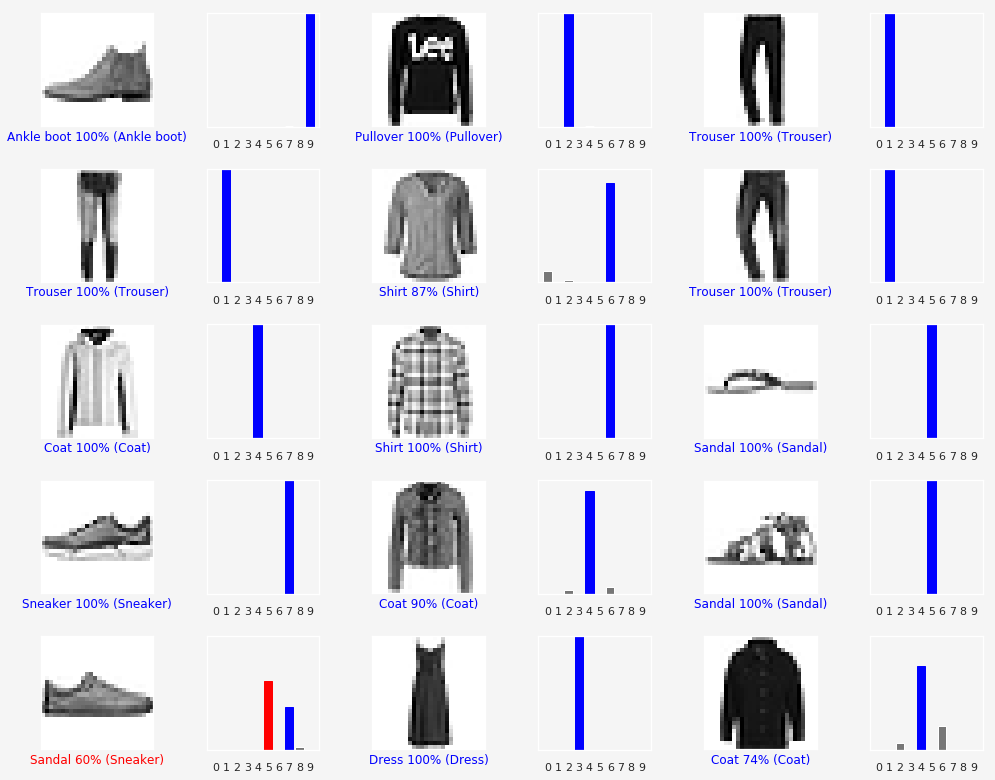

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Saving the model

### Saving the architecture (topology) of the network

In [0]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### Saving network weights

In [0]:
model.save_weights("fashion_model.h5")